# Domain-Transportation

# Flight price prediction

The objective of this project is to predict flight prices given the various parameters. . This is a regression problem since the target or dependent variable is the price (continuous numeric value)

Done by-Group 15

# 1.DATA COLLECTION

https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

Here the data set used consist of 10683 instances and 11 coloumns and is in the xlsx format.

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
data=pd.read_excel('Data_Train.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
data.shape

(10683, 11)

In [10]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# 2.Pre-processing

1.Missing value handling

In [11]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

So it is observed that there are missing values in column Route and Total stops

In [12]:
data.dropna(inplace= True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Here in both columns route and total stops there are only one missing value so we are dropping the misssing value.Hence the missing values are removed.

3.Outlier detection

Price                AxesSubplot(0.125,0.749828;0.227941x0.130172)
Duration_hours    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
Duration_mins     AxesSubplot(0.672059,0.749828;0.227941x0.130172)
dtype: object

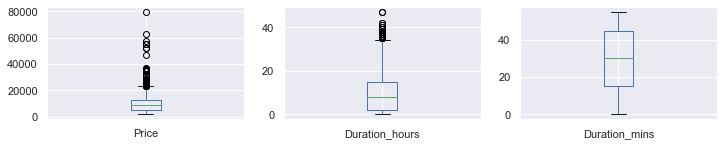

In [13]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
data['Duration_hours']=data.Duration.apply(lambda x:get_duration(x)[0])
data['Duration_mins']=data.Duration.apply(lambda x:get_duration(x)[1])
data.plot(kind='box',subplots=True,figsize=(12,12),layout=(5,3))

There are outliers in price and duration hours

In [14]:
# Calculating percentiles
q1 = np.percentile(data['Price'],25, interpolation = "midpoint")
q2 = np.percentile(data['Price'],50, interpolation = "midpoint")
q3 = np.percentile(data['Price'],75, interpolation = "midpoint")

print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2}".format(q1,q2,q3))

 Q1 = 5277.0 
 Q2 = 8372.0 
 Q3 = 12373.0


In [15]:
# Calculating inter quartile range as well as the upper and lower limit of outliers

IQR=q3-q1
print('IQR = ',IQR)

low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

IQR =  7096.0
Upper limit =  23017.0 
Lower limit =  -5367.0


In [16]:
outlier = []

for i in data['Price']:
    if (i>up_lim or i<low_lim):
        outlier.append(i)
        
print(outlier)

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [17]:
data.loc[(data['Price']>up_lim ) | (data['Price']<low_lim)].index

Int64Index([  123,   396,   486,   510,   597,   628,   657,   785,   826,
              936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
             1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
             2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
             3535,  3700,  4012,  4521,  4829,  5013,  5136,  5372,  5439,
             5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,  6314,
             6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,  7537,
             7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,  8451,
             8470,  8536,  8598,  8940,  8957,  8990,  9019,  9193,  9239,
             9632,  9715,  9974, 10052, 10113, 10160, 10182, 10189, 10353,
            10364, 10383, 10439, 10511],
           dtype='int64')

In [18]:
# Removing the outliers

data.drop([123,   396,   486,   510,   597,   628,   657,   785,   826,
              936,   946,   959,   975,  1196,  1246,  1341,  1424,  1466,
             1478,  1629,  1654,  1785,  1918,  2055,  2099,  2108,  2495,
             2556,  2618,  2635,  2693,  2924,  3032,  3111,  3257,  3400,
             3535,  3700,  4012,  4521,  4829,  5013,  5136,  5372,  5439,
             5662,  5701,  5710,  5719,  5738,  5745,  5856,  5986,  6314,
             6407,  6576,  6588,  6605,  6991,  7351,  7356,  7377,  7537,
             7554,  7617,  7713,  7724,  7756,  7902,  8020,  8080,  8451,
             8470,  8536,  8598,  8940,  8957,  8990,  9019,  9193,  9239,
             9632,  9715,  9974, 10052, 10113, 10160, 10182, 10189, 10353,
            10364, 10383, 10439, 10511],inplace=True)

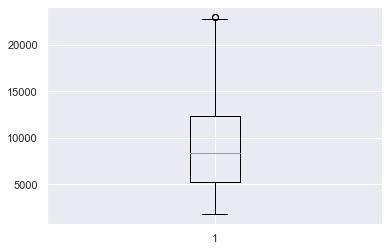

In [19]:
# Boxplot of 'Price' after removing outliers

plt.boxplot(data['Price'])
plt.show()

In [20]:
# Calculating percentiles

q1 = np.percentile(data['Duration_hours'],25, interpolation = "midpoint")
q2 = np.percentile(data['Duration_hours'],50, interpolation = "midpoint")
q3 = np.percentile(data['Duration_hours'],75, interpolation = "midpoint")

print(" Q1 = {0} \n Q2 = {1} \n Q3 = {2}".format(q1,q2,q3))

 Q1 = 2.0 
 Q2 = 8.0 
 Q3 = 15.0


In [21]:
# Calculating inter quartile range as well as the upper and lower limit of outliers

IQR=q3-q1
print('IQR = ',IQR)

low_lim=q1-(1.5*IQR)
up_lim=q3+(1.5*IQR)
print('Upper limit = ',up_lim,'\nLower limit = ',low_lim)

IQR =  13.0
Upper limit =  34.5 
Lower limit =  -17.5


In [22]:
# Creating a list of outliers

outlier = []

for i in data['Duration_hours']:
    if (i>up_lim or i<low_lim):
        outlier.append(i)
        
print(outlier)

[37, 38, 35, 35, 37, 36, 35, 47, 38, 35, 37, 37, 37, 37, 38, 36, 38, 38, 37, 37, 38, 38, 36, 35, 38, 38, 38, 38, 38, 38, 38, 35, 36, 37, 36, 38, 42, 38, 37, 39, 38, 38, 35, 37, 37, 38, 38, 37, 36, 38, 38, 41, 38, 38, 38, 42, 38, 38, 37, 36, 38, 37, 37, 38, 38, 38, 37, 39, 38, 40, 47, 38]


In [23]:
# Finding index values of outliers

data.loc[(data['Duration_hours']>up_lim ) | (data['Duration_hours']<low_lim)].index

Int64Index([  226,   553,   919,   925,   966,   969,   991,  1067,  1113,
             1318,  1346,  1442,  1496,  1551,  1657,  1791,  1804,  2172,
             2553,  2641,  2654,  2718,  3457,  3496,  3790,  3815,  3966,
             4047,  4118,  4463,  4655,  4785,  5516,  5711,  5782,  5933,
             5953,  6059,  6085,  6321,  6476,  6884,  7001,  7189,  7232,
             7306,  7329,  7553,  7611,  7612,  7876,  7906,  8127,  8153,
             8360,  8409,  8412,  8601,  8621,  8698,  8729,  9247,  9396,
             9484,  9551,  9673,  9703,  9848, 10020, 10326, 10456, 10639],
           dtype='int64')

In [24]:
data.drop([  226,   553,   919,   925,   966,   969,   991,  1067,  1113,
             1318,  1346,  1442,  1496,  1551,  1657,  1791,  1804,  2172,
             2553,  2641,  2654,  2718,  3457,  3496,  3790,  3815,  3966,
             4047,  4118,  4463,  4655,  4785,  5516,  5711,  5782,  5933,
             5953,  6059,  6085,  6321,  6476,  6884,  7001,  7189,  7232,
             7306,  7329,  7553,  7611,  7612,  7876,  7906,  8127,  8153,
             8360,  8409,  8412,  8601,  8621,  8698,  8729,  9247,  9396,
             9484,  9551,  9673,  9703,  9848, 10020, 10326, 10456, 10639],inplace=True)

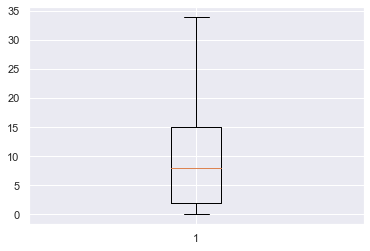

In [25]:
plt.boxplot(data['Duration_hours'])
plt.show()

So all the outliers in price and duration column are removed

3.Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        print(i)
        data[i]=le.fit_transform(data[i])

In [32]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_hours,Duration_mins
0,3,24,0,5,18,211,230,240,4,5,3897,2,50
1,1,6,3,0,81,31,898,316,1,5,7662,7,25
2,4,43,2,1,115,70,409,106,1,5,13882,19,0
3,3,10,3,0,88,164,1306,291,0,5,6218,5,25
4,3,0,0,5,29,149,1224,283,0,5,13302,4,45


So it observed that all the catogrical data is converted to numerical using label encoder.

# 3.Exploratory Data Analysis

1.Univariate analysis

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

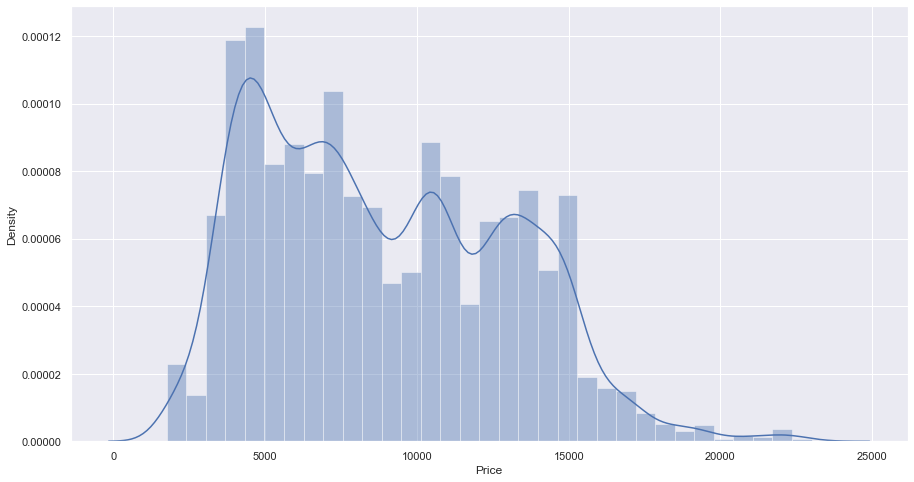

In [28]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

From this distance plot it is observed that majority of flights have price range between 5000 and 20000.Price range is skewed towards middle

In [41]:
catogrical=['Airline','Source','Destination','Additional_Info']

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


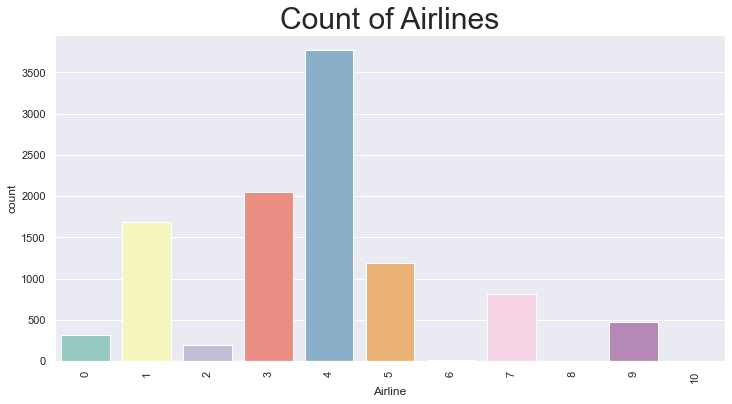

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(data['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

From this countplot it is observed that airline 4 have the highest count.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


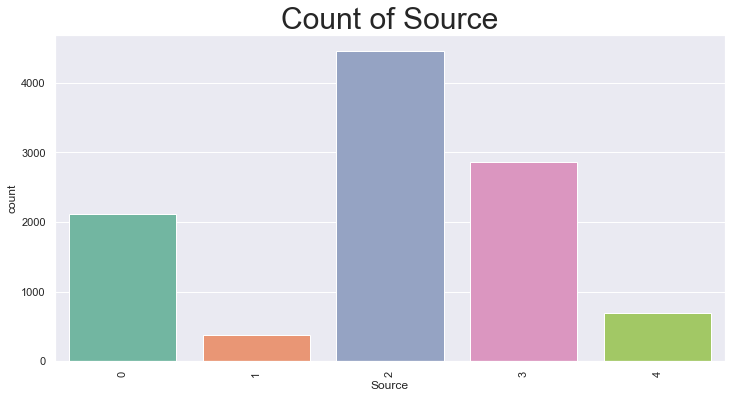

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

From this countplot it is  observed that source 2 has highest count

2.Bivariate analysis

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


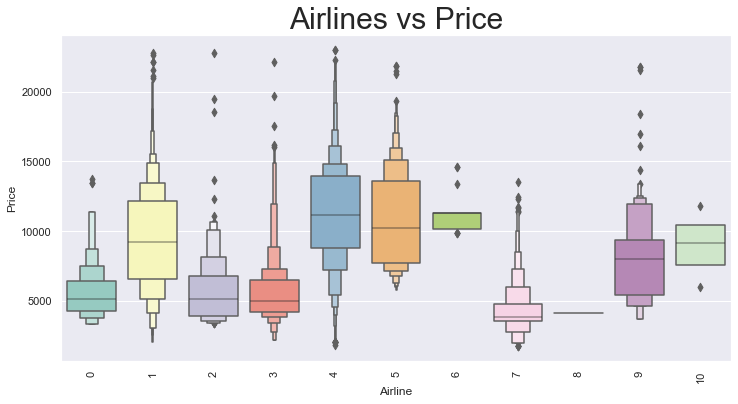

In [38]:
plt.figure(figsize=(12,6))
sns.boxenplot(data['Airline'], data['Price'], palette='Set3')
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

From this graph it is observed that airline 4 have highest price range.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


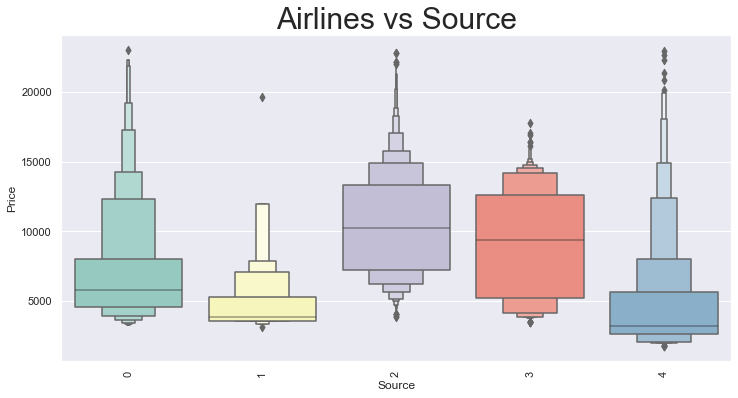

In [39]:
plt.figure(figsize=(12,6))
sns.boxenplot(data['Source'], data['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)
plt.show()

From this graph it is observed that souce 2 has the highest price range.

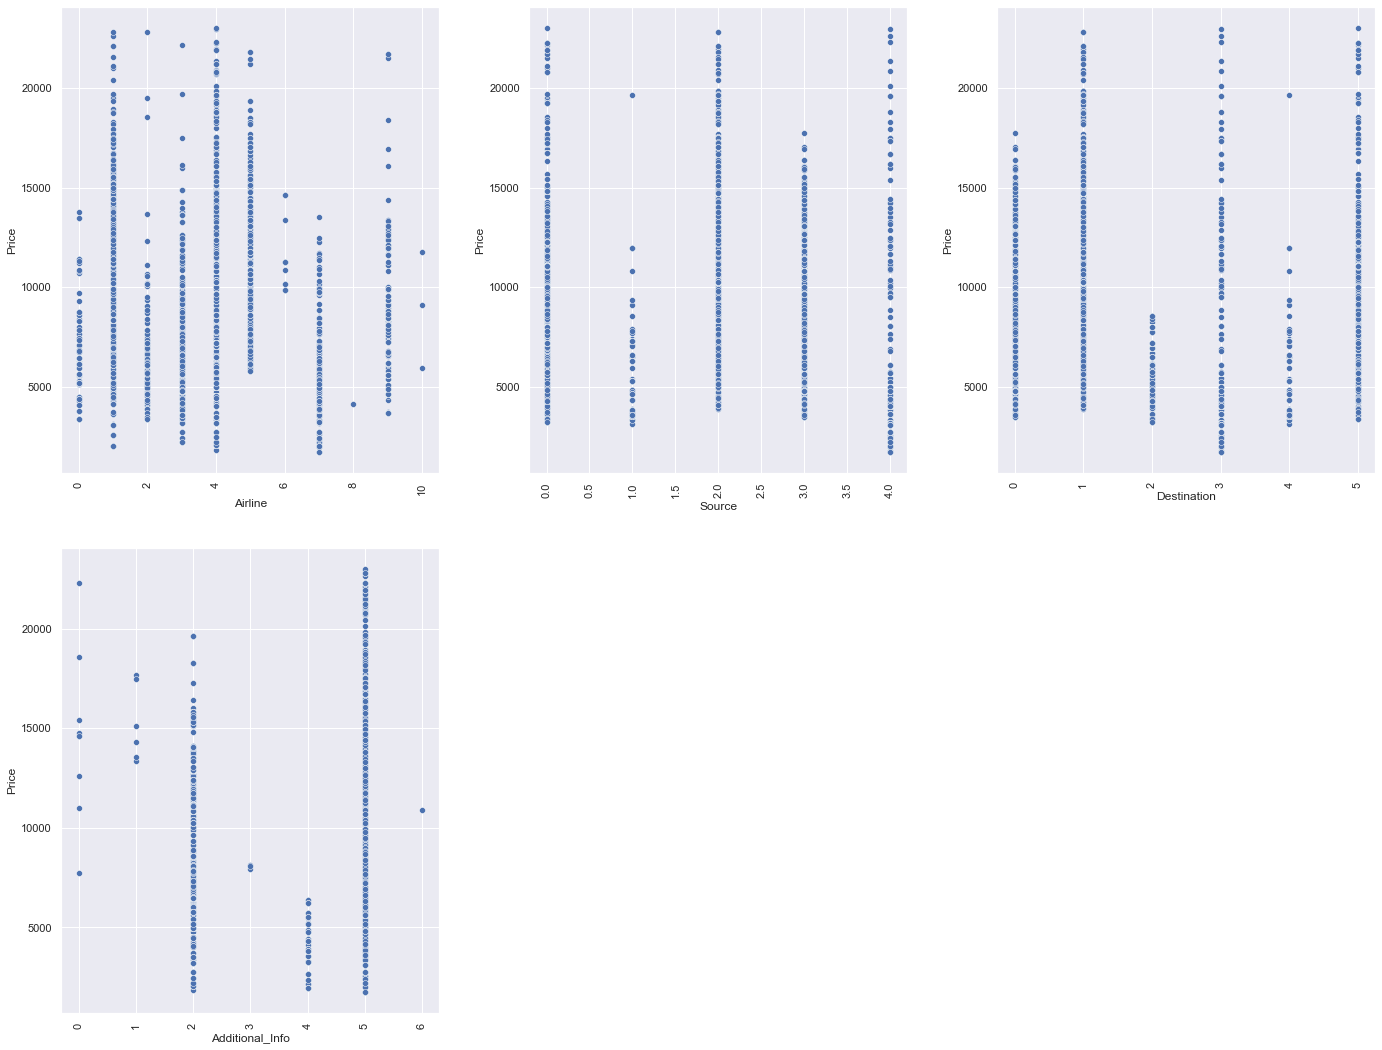

In [42]:
c=1
plt.figure(figsize=(20,45))
for i in catogrical:
    plt.subplot(6,3,c)
    sns.scatterplot(x=data[i],y=data.Price)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()

This graph shows the relationship between dependant and indepandant values,based on scaterplot.

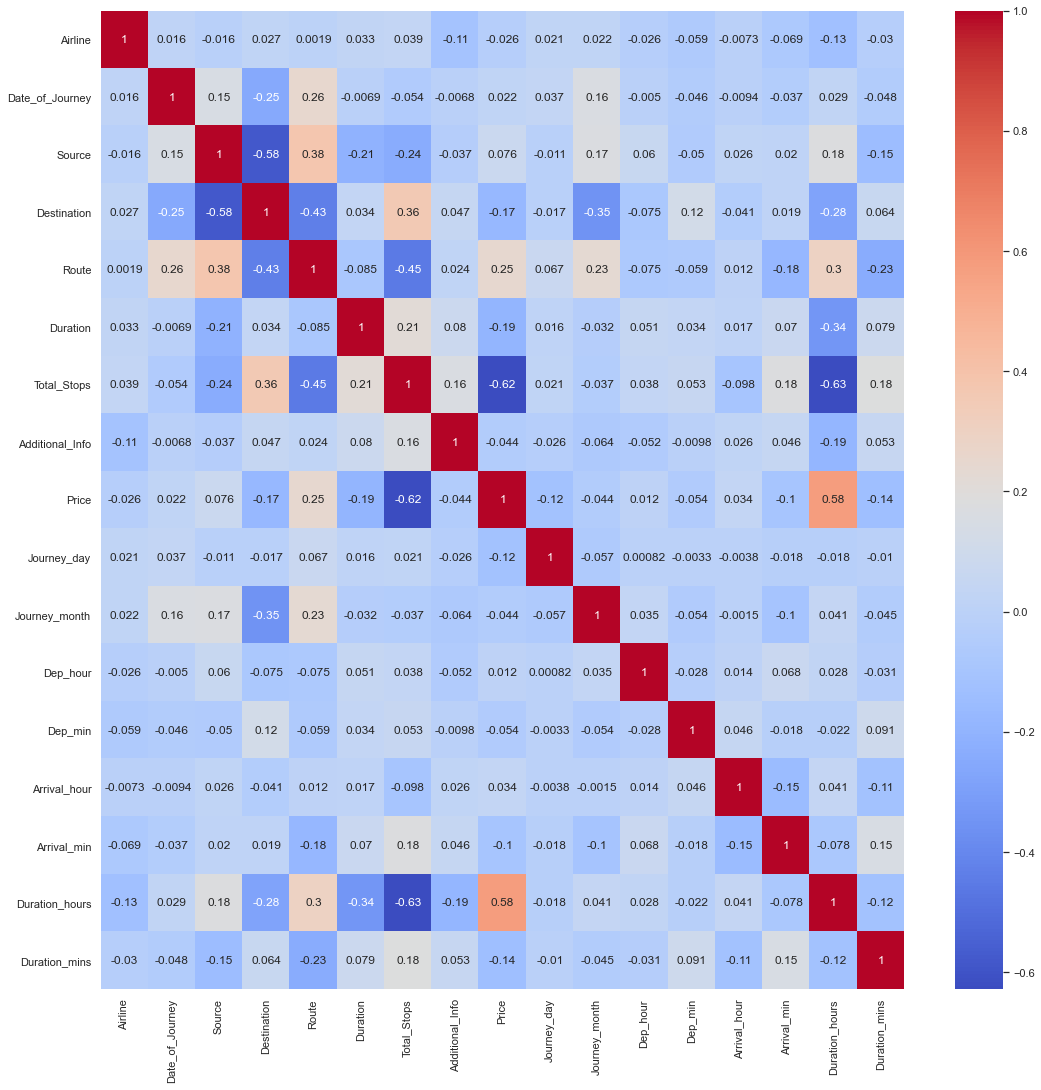

In [44]:
plt.figure(figsize = (18,18))

sns.heatmap(data.corr(),annot= True, cmap = "coolwarm")

plt.show()


Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [34]:
ds_x=data.drop('Price',axis=1)
y=data['Price']

In [35]:
dataset=sc.fit_transform(ds_x)
x=pd.DataFrame(dataset,columns=ds_x.columns)

In [36]:
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_hours,Duration_mins
0,-0.367511,0.010618,-1.675534,2.471345,-1.553633,1.683061,-1.921965,0.504037,1.393656,0.509415,-0.977862,1.272061
1,-1.355432,-1.461743,0.882649,-0.972322,0.230743,-1.270467,0.114826,1.246335,-0.259055,0.509415,-0.369511,-0.201793
2,0.126449,1.564776,0.029922,-0.283588,1.193740,-0.630536,-1.376178,-0.804753,-0.259055,0.509415,1.090531,-1.675648
3,-0.367511,-1.134552,0.882649,-0.972322,0.429007,0.911862,1.358854,1.002158,-0.809958,0.509415,-0.612851,-0.201793
4,-0.367511,-1.952530,-1.675534,2.471345,-1.242075,0.665734,1.108829,0.924021,-0.809958,0.509415,-0.734522,0.977291
...,...,...,...,...,...,...,...,...,...,...,...,...
10511,-1.849393,1.401180,0.882649,-0.972322,-0.335725,1.223623,1.169811,0.464968,1.393656,0.509415,-0.977862,0.092978
10512,-1.355432,0.419607,0.882649,-0.972322,-0.335725,1.387708,1.303971,0.474736,1.393656,0.509415,-0.977862,0.387749
10513,0.126449,0.419607,-1.675534,0.405145,-1.553633,-0.827438,-0.135199,0.757981,1.393656,0.509415,-0.856192,-1.675648
10514,2.596253,-1.952530,-1.675534,2.471345,-1.553633,-0.269550,0.212397,0.484503,1.393656,0.509415,-0.977862,0.682520


# 4.Modelling

In [47]:
# Building SVR,KNN and linear regression models 

svr=SVR()
knn=KNeighborsRegressor()
lr=LinearRegression()

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
for i in [svr,knn,lr]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score) <=0.1:
        print(i)
        print('R2 score is',r2_score(y_test,pred))
        print('R2 for train data',r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is',mean_absolute_error(y_test,pred))
        print('Mean squared error is',mean_squared_error(y_test,pred))
        print('Root Mean squared error is',(mean_squared_error(y_test,pred,squared=False)))
        

SVR()
R2 score is 0.06415890358117582
R2 for train data 0.06362120137177674
Mean absolute error is 3251.736821934903
Mean squared error is 15349861.361356858
Root Mean squared error is 3917.889911847557
KNeighborsRegressor()
R2 score is 0.7456638243482732
R2 for train data 0.8348254711687211
Mean absolute error is 1315.15587955626
Mean squared error is 4171675.138408875
Root Mean squared error is 2042.4679038870781
LinearRegression()
R2 score is 0.4599119687585146
R2 for train data 0.47071330295010205
Mean absolute error is 2338.3768549048673
Mean squared error is 8858636.828633951
Root Mean squared error is 2976.3462212306467


In [46]:
# Building  RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [43]:
rfr=RandomForestRegressor()
ad=AdaBoostRegressor()
gd=GradientBoostingRegressor()

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)
for i in [rfr,ad,gd]:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    test_score=r2_score(y_test,pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score) <=0.2:
        print(i)
        print('R2 score is',r2_score(y_test,pred))
        print('R2 for train data',r2_score(y_train,i.predict(x_train)))
        print('Mean absolute error is',mean_absolute_error(y_test,pred))
        print('Mean squared error is',mean_squared_error(y_test,pred))
        print('Root Mean squared error is',(mean_squared_error(y_test,pred,squared=False)))
        

RandomForestRegressor()
R2 score is 0.9002779161969867
R2 for train data 0.9811965823998282
Mean absolute error is 762.6212872493327
Mean squared error is 1653590.5310297296
Root Mean squared error is 1285.920110671627
AdaBoostRegressor()
R2 score is 0.5178944612653243
R2 for train data 0.5241931779402423
Mean absolute error is 2396.761441080214
Mean squared error is 7994268.906207488
Root Mean squared error is 2827.4138194129787
GradientBoostingRegressor()
R2 score is 0.8225000133435931
R2 for train data 0.8335324926067778
Mean absolute error is 1226.7593697261689
Mean squared error is 2943302.8873797846
Root Mean squared error is 1715.605691113137


So it is observed that random forest algorithm and gradient boost algorithm have high score compared to others.  

# 5.Crossvalidation and model tuning

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
for i in range(2,9):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.883749729705556
RandomForestRegressor() 0.8922201824503052
RandomForestRegressor() 0.897723887109291
RandomForestRegressor() 0.899784540133779
RandomForestRegressor() 0.8988420626877253
RandomForestRegressor() 0.901170223070236
RandomForestRegressor() 0.9016815787374892


In [35]:
for i in range(2,9):
    cv=cross_val_score(gd,x,y,cv=i)
    print(gd,cv.mean())

GradientBoostingRegressor() 0.8175653393901401
GradientBoostingRegressor() 0.8215761808718446
GradientBoostingRegressor() 0.8220839877048443
GradientBoostingRegressor() 0.8223118333801647
GradientBoostingRegressor() 0.8224994890326697
GradientBoostingRegressor() 0.8219032139538613
GradientBoostingRegressor() 0.822849726885446


So after cross validation it is observed that random forest have outperformed Gradient Boosting algorithm

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_samples':[50,100,250,1000],'min_samples_split':[2,4,10]}
gcv_rfr=GridSearchCV(rfr,param_grid,cv=3)      

In [45]:
res=gcv_rfr.fit(x_train,y_train)

In [35]:
res.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 100}

In [39]:
param_grid2={'alpha':[0.9,0.09,0.1],'learning_rate':[0.1,0.01],'max_depth':[3,4,5],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,4],'n_estimators':[100,50,10]}


In [ ]:
gcv_gd=GridSearchCV(gd,param_grid2,cv=3)

In [ ]:
res2=gcv_gd.fit(x_train,y_train)

In [ ]:
res2.best_params_